In [1]:
%pylab inline
#import sys

#sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('../../MW_viz/matplotlib.mplstyle')
#import io_sims as ios
#import gizmo_analysis as ga
#import pynbody
#import halo_analysis as halo

#from astropy import units as u
#import nba
#import healpy as hp
#from  healpy.newvisufunc import projview, newprojplot

#import Corrfunc
#from Corrfunc.mocks.DDtheta_mocks  import DDtheta_mocks
#from Corrfunc.utils import convert_3d_counts_to_cf
#from FIRE_analysis import mollweide_projection
#from astropy.coordinates import Angle

#from scipy import linalg
from matplotlib import colors
#import matplotlib.patheffects as PathEffects

Populating the interactive namespace from numpy and matplotlib


/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 18
mpl.rcParams['text.usetex'] = True

In [3]:
wm12b = np.loadtxt('../data/corrfunc/m12b_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12c = np.loadtxt('../data/corrfunc/m12c_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12f = np.loadtxt('../data/corrfunc/m12f_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12i = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12m = np.loadtxt('../data/corrfunc/m12m_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12r = np.loadtxt('../data/corrfunc/m12r_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12w = np.loadtxt('../data/corrfunc/m12w_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')

In [4]:
def host_times(sim):
    #snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    snap_times = "../data/snapshot_times.txt"
    times = np.loadtxt(snap_times, usecols=3)
    return times[:] 

In [5]:
m12b_t = host_times('m12b')
m12c_t = host_times('m12c')
m12f_t = host_times('m12f')
m12i_t = host_times('m12i')
m12m_t = host_times('m12m')
m12r_t = host_times('m12r')
m12w_t = host_times('m12w')

In [6]:
# m12b 

# subhalos 

m12b_wsub2 = np.loadtxt('../data/corrfunc/m12b_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')
#m12b_wsub = np.loadtxt('../data/corrfunc/m12b_wmatrix_corrfunc_50_300_subhalos_no_sats_False.txt')

# satellites 
#m12b_wsat = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12b_dm = np.zeros((300, 180)) 
m12b_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12b_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12b_wmatrix_corrfunc_50_300_dm_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12b_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12b_wmatrix_corrfunc_50_300_stars_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [7]:
# m12f 

# subhalos 

m12f_wsub = np.loadtxt('../data/corrfunc/m12f_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12f_wsat = np.loadtxt('../data/corrfunc/m12f_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12f_dm = np.zeros((300, 180)) 
m12f_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12f_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12f_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12f_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12f_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [8]:
# m12i

# subhalos 

m12i_wsub = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12i_wsat = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12i_dm = np.zeros((300, 180)) 
m12i_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12i_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_dark_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12i_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [9]:
# m12r

# subhalos 

m12r_wsub = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12r_wsat = np.loadtxt('../data/corrfunc/m12i_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12r_dm = np.zeros((300, 180)) 
m12r_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12r_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12r_wmatrix_corrfunc_50_300_dark_particles_sats3_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12r_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12r_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))



In [10]:
# m12m

# subhalos 

m12m_wsub = np.loadtxt('../data/corrfunc/m12m_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12m_wsat = np.loadtxt('../data/corrfunc/m12m_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12m_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12m_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12m_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))



In [11]:
# m12w

# subhalos 

m12w_wsub = np.loadtxt('../data/corrfunc/m12w_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12w_wsat = np.loadtxt('../data/corrfunc/m12w_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12w_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12w_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12w_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


In [12]:
# m12c

# subhalos 

m12c_wsub = np.loadtxt('../data/corrfunc/m12c_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12c_wsat = np.loadtxt('../data/corrfunc/m12c_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12c_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12c_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12c_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


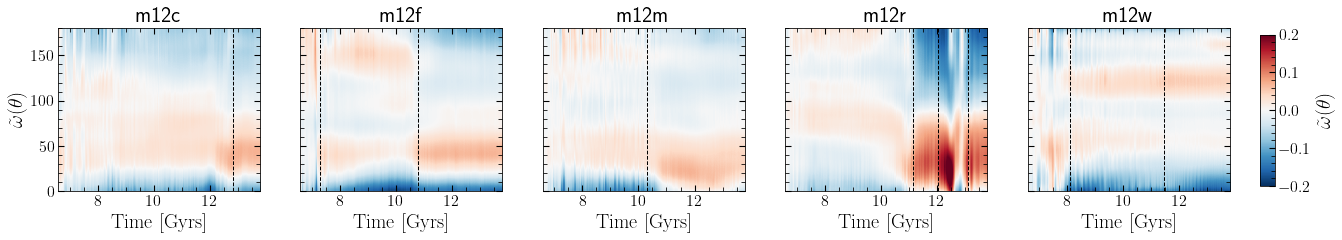

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(21, 3), sharey=True, sharex=True)

#ax[0].imshow(((m12b_dm+1)/(m12b_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
#       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

ax[0].imshow((((m12c_dm+1)/(m12c_dm[0]+1)) - 1).T, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[m12c_t[300], m12c_t[-1], 0, 180], aspect='auto')

ax[1].imshow((((m12f_dm+1)/(m12f_dm[0]+1)) - 1).T, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[m12f_t[300], m12f_t[-1], 0, 180], aspect='auto')

#ax[2].imshow(((m12i_dm+1)/(m12i_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
#       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')

ax[2].imshow((((m12m_dm+1)/(m12m_dm[0]+1)) - 1).T, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[m12m_t[300], m12m_t[-1], 0, 180], aspect='auto')

im = ax[3].imshow((((m12r_dm+1)/(m12r_dm[0]+1)) - 1).T, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[m12r_t[300], m12r_t[-1], 0, 180], aspect='auto')

ax[4].imshow((((m12w_dm+1)/(m12w_dm[0]+1)) - 1).T, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[m12w_t[300], m12w_t[-1], 0, 180], aspect='auto')

#ax[1].set_xlim(0, 180)
#ax[1].set_xticks([0, 60, 120, 180])


#ax[0].axvline(m12b_t[385], c='k', ls='--', lw=1)
ax[0].axvline(m12c_t[549], c='k', ls='--', lw=1)
ax[1].axvline(m12f_t[462], c='k', ls='--', lw=1)
ax[1].axvline(7.3, c='k', ls='--', lw=1)

ax[2].axvline(m12m_t[444], c='k', ls='--', lw=1)

ax[3].axvline(m12r_t[477], c='k', ls='--', lw=1)
ax[3].axvline(m12r_t[515], c='k', ls='--', lw=1)
ax[3].axvline(m12r_t[560], c='k', ls='--', lw=1)
ax[4].axvline(m12w_t[358], c='k', ls='--', lw=1)
ax[4].axvline(m12w_t[490], c='k', ls='--', lw=1)


#m12b_peri = [385]
#m12c_peri = [549]
#m12f_peri = [462]
#m12i_peri = []
#m12m_peri = [444]
#m12r_peri = [477, 515, 560]
#m12w_peri = [358, 490]

#ax[0].set_title('m12b', fontsize=14)
ax[0].set_title('m12c', fontsize=22)
ax[1].set_title('m12f', fontsize=22)
#ax[3].set_title('m12i', fontsize=14)
ax[2].set_title('m12m', fontsize=22)
ax[3].set_title('m12r', fontsize=22)
ax[4].set_title('m12w', fontsize=22)

ax[0].set_ylabel(r'$\tilde{\omega}(\theta)$')

#ax[1].set_xlabel(r'$\tilde{\omega}(\theta)$')
#ax[2].set_xlabel(r'$\tilde{\omega}(\theta)$')
#ax[3].set_xlabel(r'$\tilde{\omega}(\theta)$')
#ax[4].set_xlabel(r'$\tilde{\omega}(\theta)$')
#ax[5].set_xlabel(r'$\tilde{\omega}(\theta)$')
#ax[6].set_xlabel(r'$\tilde{\omega}(\theta)$')

ax[0].set_xlabel(r'$\rm{Time\ [Gyrs]}$')
ax[1].set_xlabel(r'$\rm{Time\ [Gyrs]}$')
ax[2].set_xlabel(r'$\rm{Time\ [Gyrs]}$')
ax[3].set_xlabel(r'$\rm{Time\ [Gyrs]}$')
ax[4].set_xlabel(r'$\rm{Time\ [Gyrs]}$')

cbar_ax1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax1, orientation='vertical')
cbar.set_label(r'$\tilde{\omega} (\theta)$')

#plt.savefig('corrfunc_dm_all_2d.pdf', bbox_inches='tight')
#plt.savefig('corrfunc_dm_all_2d.png', bbox_inches='tight')

In [14]:
# DM particles 
mwlmc_dm = np.zeros((400, 180)) 

for i in range(0, 391, 10):
    mwlmc_dm[i:i+10] = np.loadtxt('../data/corrfunc/MWLMC6_wmatrix_corrfunc_50_300_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


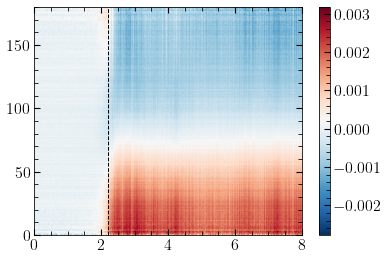

In [15]:
im = imshow(((mwlmc_dm+1) / (mwlmc_dm[0]+1)).T - 1, cmap='RdBu_r', extent=[0, 8, 0, 180], aspect='auto', origin='lower')
colorbar(im)
axvline(110*0.02, c='k', ls='--', lw=1)

Text(0.1, 100, '$\\rm{1st\\ pericenter}$')

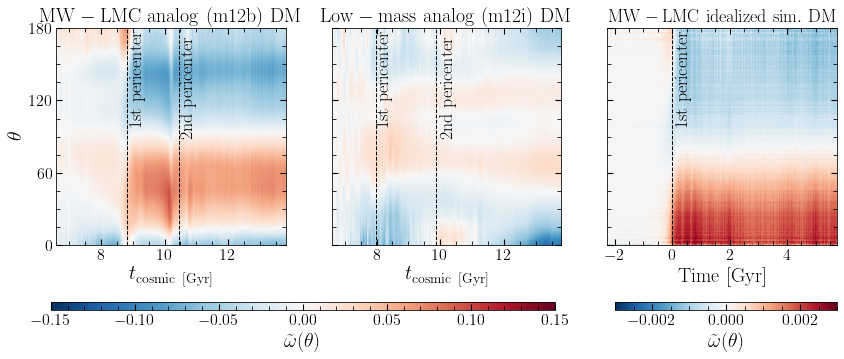

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

im1 = ax[0].imshow(((m12b_dm+1)/(m12b_dm[0]+1)).T - 1, origin='lower', vmin=-0.15, vmax=0.15, cmap='RdBu_r', 
       extent=[m12b_t[300], m12b_t[-1], 0, 180], aspect='auto')


im2 = ax[1].imshow(((m12i_dm+1)/(m12i_dm[0]+1)).T - 1, origin='lower', vmin=-0.15, vmax=0.15, cmap='RdBu_r', 
       extent=[m12i_t[300], m12i_t[-1], 0, 180], aspect='auto')

im3 = ax[2].imshow(((mwlmc_dm+1) / (mwlmc_dm[0]+1)).T - 1, origin='lower', cmap='RdBu_r', 
       extent=[0-113*0.02, 8-113*0.02, 0, 180], aspect='auto', vmin=-0.003, vmax=0.003)


ax[0].set_ylim(0, 180)
ax[0].set_yticks([0, 60, 120, 180])

ax[0].axvline(m12b_t[385], c='k', ls='--', lw=1)
ax[0].axvline(m12b_t[449], c='k', ls='--', lw=1)

ax[1].axvline(m12b_t[353], c='k', ls='--', lw=1)
ax[1].axvline(m12b_t[426], c='k', ls='--', lw=1)


ax[2].axvline(0, c='k', ls='--', lw=1)
ax[0].set_title(r'$\mathrm{MW-LMC\ analog\ (m12b)\ DM}$', fontsize=20)
ax[1].set_title(r'$\mathrm{Low-mass\ analog\ (m12i)\ DM}$', fontsize=20)
ax[2].set_title(r'$\rm{MW-LMC\ idealized\ sim.\ DM}$', fontsize=18)

ax[0].set_ylabel(r'$\theta$')
ax[0].set_xlabel(r'$t_{\rm{cosmic}\ [Gyr]}$')
ax[1].set_xlabel(r'$t_{\rm{cosmic}\ [Gyr]}$')
ax[2].set_xlabel(r'$\rm{Time}\ [Gyr]$')

cbar_ax1 = fig.add_axes([0.12, -0.1, 0.5, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')


cbar_ax2 = fig.add_axes([0.68, -0.1, 0.22, 0.03])
cbar = fig.colorbar(im3, cax=cbar_ax2, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')

ax[0].text(8.9, 100,  r'$\rm{1st\ pericenter}$', rotation=90)
ax[0].text(10.5, 90,  r'$\rm{2nd\ pericenter}$', rotation=90)


ax[1].text(8, 100,  r'$\rm{1st\ pericenter}$', rotation=90)
ax[1].text(10, 90,  r'$\rm{2nd\ pericenter}$', rotation=90)

ax[2].text(0.1, 100,  r'$\rm{1st\ pericenter}$', rotation=90)

#plt.savefig('corrfunc_main_dm_all.pdf', bbox_inches='tight')

Text(10, 90, '$\\rm{2nd\\ pericenter}$')

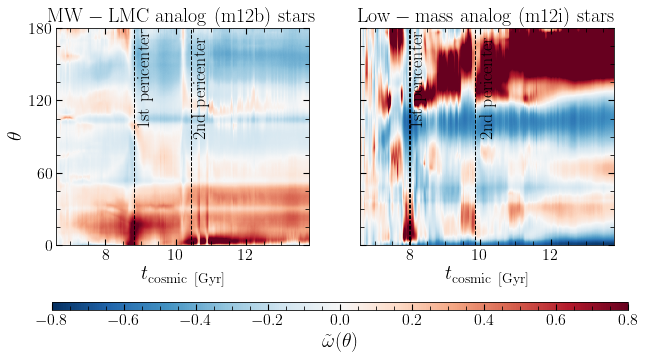

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

im1 = ax[0].imshow(((m12b_st+1)/(m12b_st[0]+1)).T - 1, origin='lower', vmin=-0.8, vmax=0.8, cmap='RdBu_r', 
       extent=[m12b_t[300], m12b_t[-1], 0, 180], aspect='auto')


im2 = ax[1].imshow(((m12i_st+1)/(m12i_st[0]+1)).T - 1, origin='lower', vmin=-0.8, vmax=0.8, cmap='RdBu_r', 
       extent=[m12i_t[300], m12i_t[-1], 0, 180], aspect='auto')


ax[0].set_ylim(0, 180)
ax[0].set_yticks([0, 60, 120, 180])


ax[0].axvline(m12b_t[385], c='k', ls='--', lw=1)
ax[0].axvline(m12b_t[449], c='k', ls='--', lw=1)


ax[1].axvline(m12b_t[353], c='k', ls='--', lw=1)
ax[1].axvline(m12b_t[426], c='k', ls='--', lw=1)

#ax[2].axvline(0, c='k', ls='--', lw=1)
ax[0].set_title(r'$\mathrm{MW-LMC\ analog\ (m12b)\ stars}$', fontsize=20)
ax[1].set_title(r'$\mathrm{Low-mass\ analog\ (m12i)\ stars}$', fontsize=20)
#ax[2].set_title('MW-LMC', fontsize=14)

ax[0].set_ylabel(r'$\theta$')
ax[0].set_xlabel(r'$t_{\rm{cosmic}\ [Gyr]}$')
ax[1].set_xlabel(r'$t_{\rm{cosmic}\ [Gyr]}$')
#ax[2].set_xlabel(r'$\rm{Time}\ [Gyrs]$')

cbar_ax1 = fig.add_axes([0.12, -0.1, 0.8, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')

ax[1].axvline(8, c='k', ls='--', lw=1)

ax[0].text(8.9, 100,  r'$\rm{1st\ pericenter}$', rotation=90)
ax[0].text(10.5, 90,  r'$\rm{2nd\ pericenter}$', rotation=90)

ax[1].text(8, 100,  r'$\rm{1st\ pericenter}$', rotation=90, color='k')
ax[1].text(10, 90,  r'$\rm{2nd\ pericenter}$', rotation=90, color='k')

#cbar_ax2 = fig.add_axes([0.68, -0.1, 0.22, 0.03])
#cbar = fig.colorbar(im3, cax=cbar_ax2, orientation='horizontal')
#cbar.set_label(r'$\tilde{\omega} (\theta)$')

#plt.savefig('corrfunc_main_st_all.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Halos with mild changes in their orbital poles distribution')

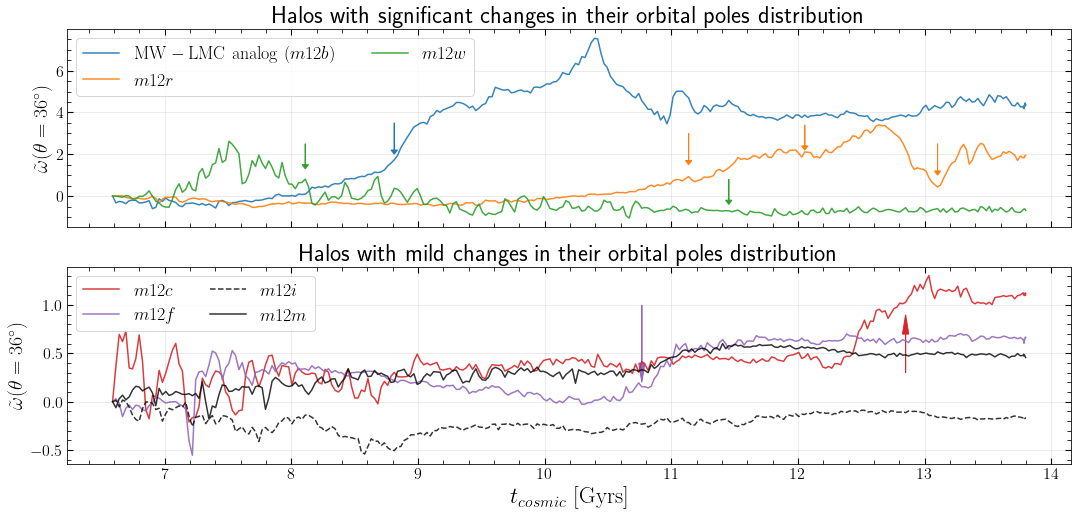

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True, sharey=False)
ax[0].plot(m12b_t[300:-1], (m12b_dm[:,36]/m12b_dm[0,36]) - 1, lw=1.5, label=r'$\rm{MW-LMC\ analog}$ $(m12b)$', alpha=0.9, c='C0')
ax[0].plot(m12b_t[300:-1], (m12r_dm[:,36]/m12r_dm[0,36]) - 1, lw=1.5, label=r'$m12r$', alpha=0.9, c='C1')
ax[0].plot(m12b_t[300:-1], (m12w_dm[:,36]/m12w_dm[0,36]) - 1, lw=1.5, label=r'$m12w$', alpha=0.9, c='C2')

ax[1].plot(m12b_t[300:-1], (m12c_dm[:,36]/m12c_dm[0,36]) - 1, lw=1.5, label=r'$m12c$', alpha=0.9, c='C3')
ax[1].plot(m12b_t[300:-1], (m12f_dm[:,36]/m12f_dm[0,36]) - 1, lw=1.5, label=r'$m12f$', alpha=0.9, c='C4')

ax[1].plot(m12b_t[300:-1], (m12i_dm[:,36]/m12i_dm[0,36]) - 1, lw=1.5, label=r'$m12i$', alpha=0.8, c='k', ls='--')
ax[1].plot(m12b_t[300:-1], (m12m_dm[:,36]/m12m_dm[0,36]) - 1, lw=1.5, label=r'$m12m$', alpha=0.8, c='k')


#plt.axvline(m12b_t[385], c='C0', ls='--', lw=1.5)
#plt.axvline(m12b_t[449], c='C0', ls=':', lw=1.5)

#plt.axvline(m12c_t[549], c='C1', ls='--', lw=1.5)
#plt.axvline(m12f_t[462], c='C2', ls='--', lw=1.5)
#plt.axvline(m12m_t[444], c='k', ls='--', lw=1)

#plt.axvline(m12r_t[477], c='C3', ls='--', lw=1.5)
#plt.axvline(m12r_t[515], c='C3', ls='--', lw=1.5)
#plt.axvline(m12r_t[560], c='C3', ls='--', lw=1.5)
#plt.axvline(m12w_t[358], c='C4', ls='--', lw=1.5)
#plt.axvline(m12w_t[490], c='C4', ls='--', lw=1.5)


ax[0].legend(fontsize=18, ncol=2)
ax[1].legend(fontsize=18, ncol=2, loc='upper left')

ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)

ax[0].set_ylabel(r'$\tilde{\omega} (\theta=36^{\circ})$')
ax[1].set_ylabel(r'$\tilde{\omega} (\theta=36^{\circ})$')

ax[1].set_xlabel(r'$t_{cosmic}\ \rm{[Gyrs]}$', fontsize=23)

ax[0].arrow(m12b_t[385], 3.5, 0, -1.3, head_width=0.05, head_length=0.2, color='C0')
ax[0].arrow(m12r_t[477], 3, 0, -1.3, head_width=0.05, head_length=0.2, color='C1')
ax[0].arrow(m12r_t[515], 3.4, 0, -1.0, head_width=0.05, head_length=0.2, color='C1')
ax[0].arrow(m12r_t[560], 2.5, 0, -1.3, head_width=0.05, head_length=0.2, color='C1')
ax[0].arrow(m12w_t[358], 2.5, 0, -1.0, head_width=0.05, head_length=0.2, color='C2')
ax[0].arrow(m12w_t[490], 0.8, 0, -1.0, head_width=0.05, head_length=0.2, color='C2')


ax[1].arrow(m12c_t[549], 0.3, 0, 0.4, head_width=0.05, head_length=0.2, color='C3')
ax[1].arrow(m12f_t[462], 1, 0, -0.6, head_width=0.05, head_length=0.2, color='C4')

#ax[0].set_xlim(6.5, 13.9)

ax[0].set_title('Halos with significant changes in their orbital poles distribution')
ax[1].set_title('Halos with mild changes in their orbital poles distribution')

#plt.savefig('corrfunc_all_36.png', bbox_inches='tight')
#plt.savefig('corrfunc_all_36.pdf', bbox_inches='tight')